# Bike Sharing Assignment Solution

### Problem Statement

A US based bike sharing company BoomBikes aspires to understand the demand for shared bikes among the people after Covid-19.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## 1.Reading and Understanding the data

Let us look at the dataset provided to understand the dataset

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read the CSV file "day.csv" into a Pandas DataFrame named 'df_day'
df_day = pd.read_csv("day.csv")

In [8]:
# Let's take a look at the first few rows
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Let's look at the shape of the data
df_day.shape

(730, 16)

In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
#let's check the data types and null value presence in the data rows
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 2.Data Transformation

Let us check the data dictionary for the values in data set and transform them wherever applicable:

In [14]:
# Updating different seasons' numeric values to string values from data dictionary.

# 1=spring
df_day.loc[(df_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
df_day.loc[(df_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
df_day.loc[(df_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
df_day.loc[(df_day['season'] == 4) , 'season'] = 'winter'

df_day['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
# Let us check the year column
df_day['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [16]:
# Let us check the month column values and associated count
df_day['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [17]:
# Below code assigns string values to month column using a user-defined function
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
df_day[['mnth']] = df_day[['mnth']].apply(object_map)

In [18]:
df_day['mnth'].value_counts()

mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [19]:
# Let us check the values and associated counts for the holiday column
df_day['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [20]:
# Let us look at the values of weekday column
df_day['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [21]:
# Below code assigns string values to weekday column using a user-defined function
def str_map(x):
    return x.map({ 1: 'Mon', 2: 'Tues',3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Applying the function to the two columns
df_day[['weekday']] = df_day[['weekday']].apply(str_map)
df_day['weekday'].value_counts()

weekday
Mon      105
Tues     105
Wed      104
Thurs    104
Fri      104
Sat      104
Sun      104
Name: count, dtype: int64

In [22]:
# Next we will check the values for workingday and weathersit columns
df_day['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [23]:
df_day['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [24]:
# Replacing the weathersit names into string values 

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df_day.loc[(df_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df_day.loc[(df_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df_day.loc[(df_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df_day.loc[(df_day['weathersit'] == 4) , 'weathersit'] = 'D'

df_day['weathersit'].value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## 3.Data Visualisation

Let's now visualise the dataset and analyse the plots.
First let us check the distribution for the numerical variables.


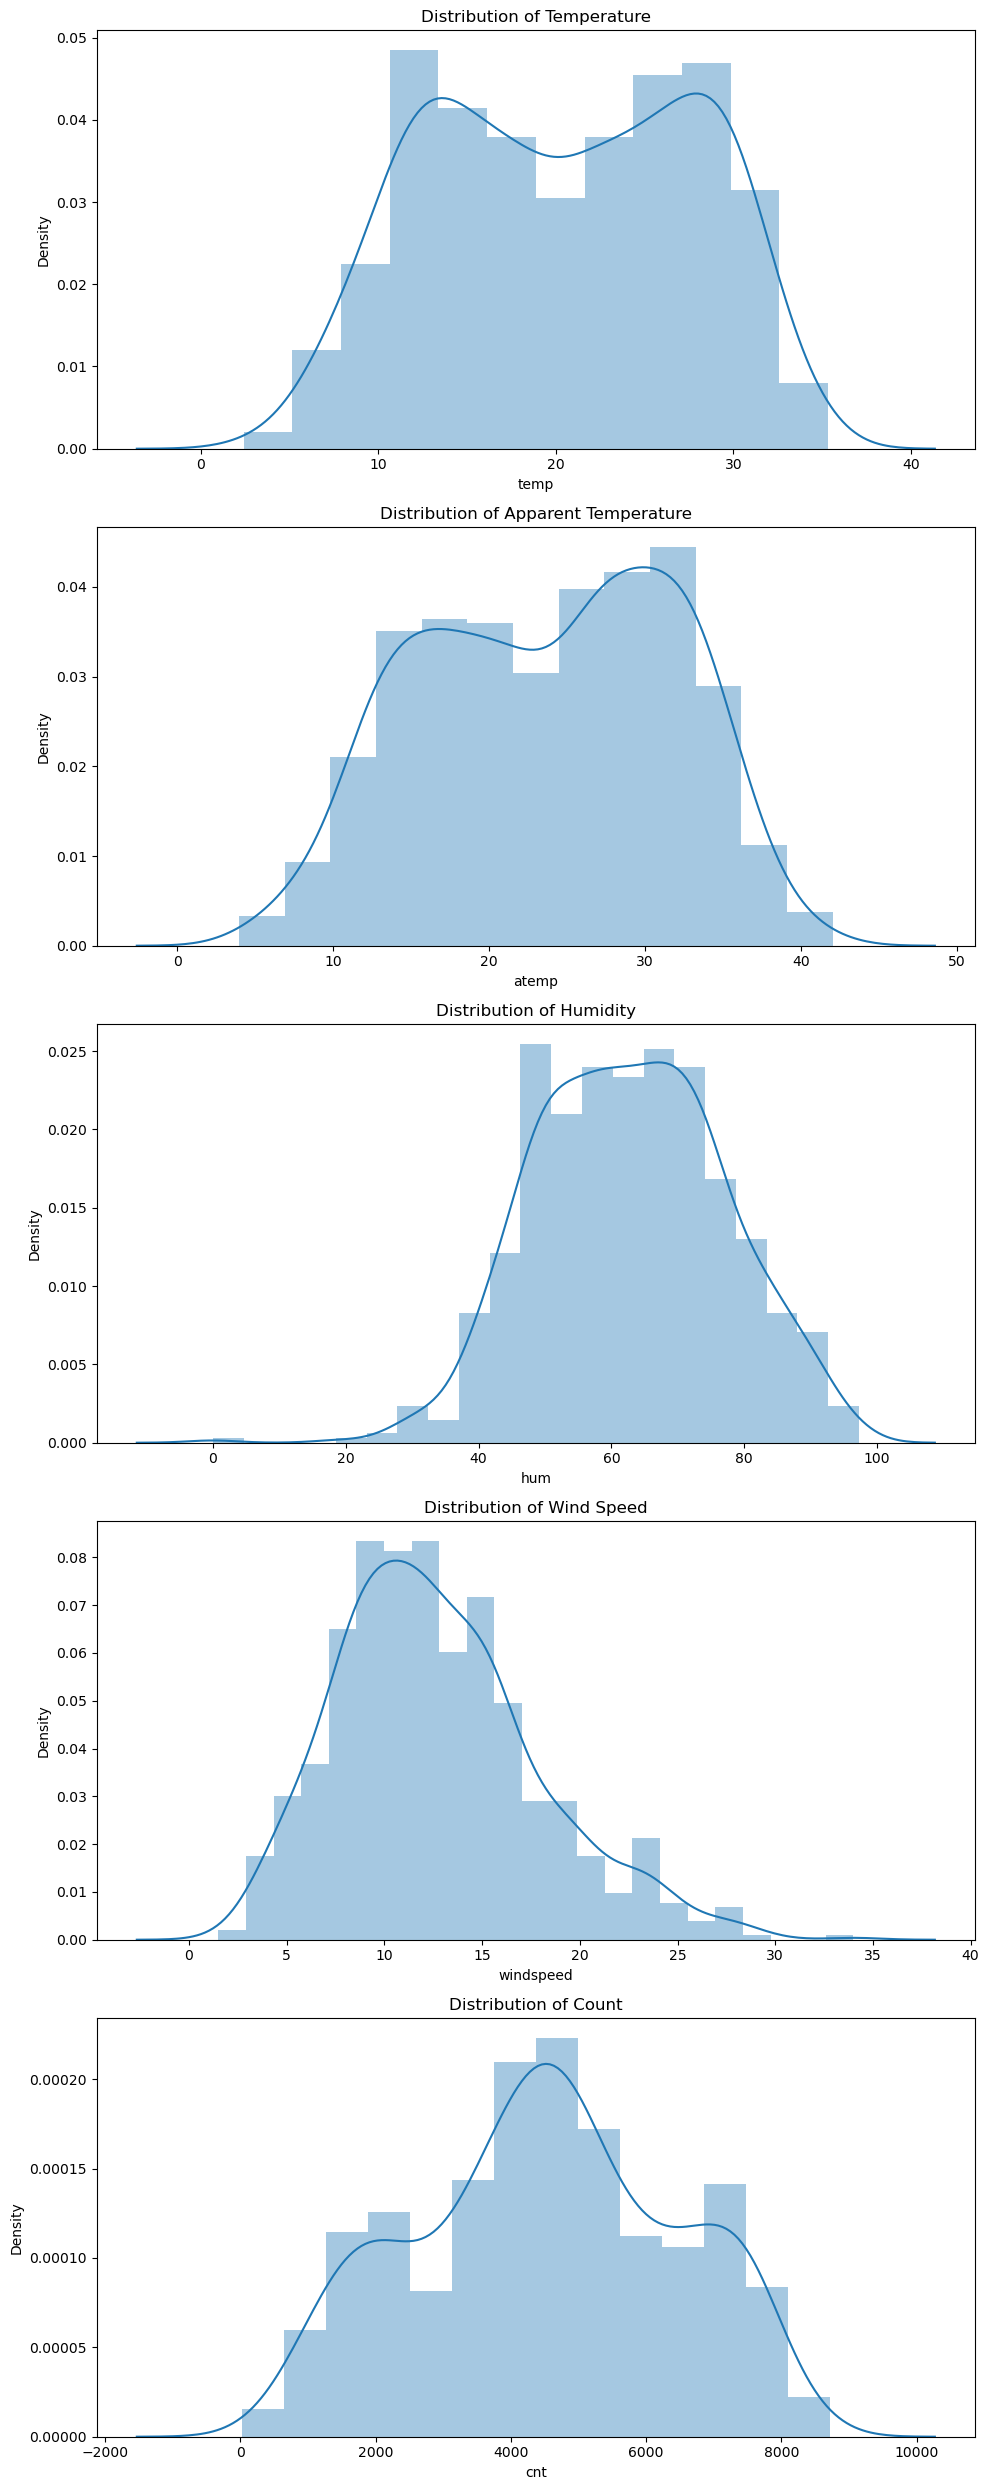

In [27]:
# Creating subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 25))

# Plotting the distributions
sns.distplot(df_day['temp'], ax=axes[0])
axes[0].set_title('Distribution of Temperature')

sns.distplot(df_day['atemp'], ax=axes[1])
axes[1].set_title('Distribution of Apparent Temperature')

sns.distplot(df_day['hum'], ax=axes[2])
axes[2].set_title('Distribution of Humidity')

sns.distplot(df_day['windspeed'], ax=axes[3])
axes[3].set_title('Distribution of Wind Speed')

sns.distplot(df_day['cnt'], ax=axes[4])
axes[4].set_title('Distribution of Count')

# Adjusting layout
plt.tight_layout()
plt.show()

Next,we will use boxplot for categorical variables and scatter plot for numerical variables.

In [29]:
#Converting date to datetime format
df_day['dteday']=df_day['dteday'].astype('datetime64[ns]')
df_day_categorical=df_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


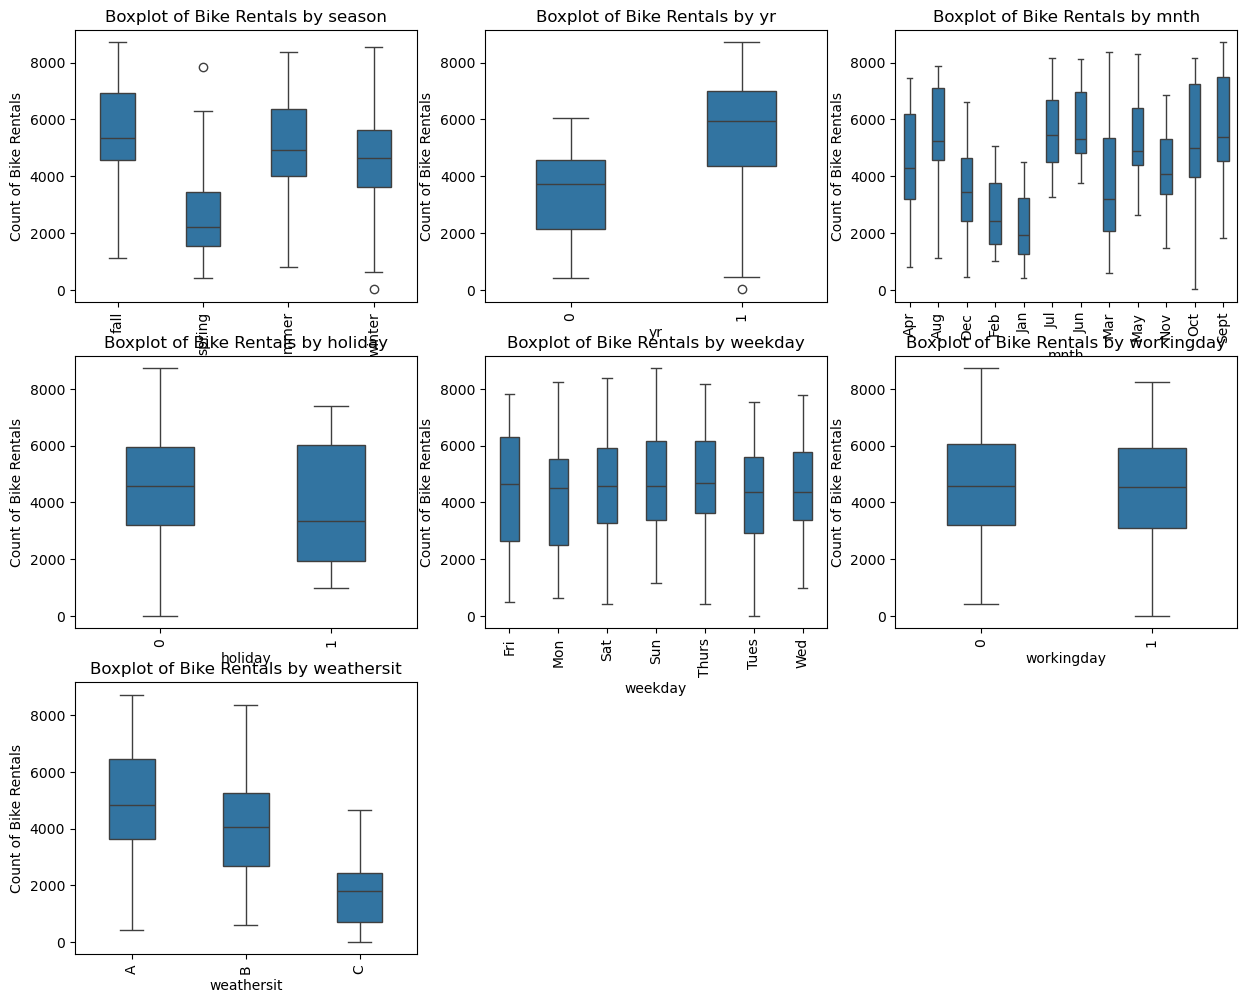

In [30]:
# visualizing variables
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    df_boxplot = df_day[['cnt', cat_var]].copy()
    df_boxplot[cat_var] = df_day[cat_var].astype('category')
    
    sns.boxplot(x=cat_var, y='cnt', data=df_boxplot, width=0.4)
    plt.title(f'Boxplot of Bike Rentals by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)

#plt.tight_layout()
plt.show()

In [31]:
# add anaysis points

In [32]:
# Converting "casual","registered" and "cnt" numeric variables to float. 


df_day['casual']= df_day['casual'].astype('float')
df_day['registered']=df_day['registered'].astype('float')
df_day['cnt']=df_day['cnt'].astype('float')

df_day_numeric = df_day.select_dtypes(include=['float64'])
df_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


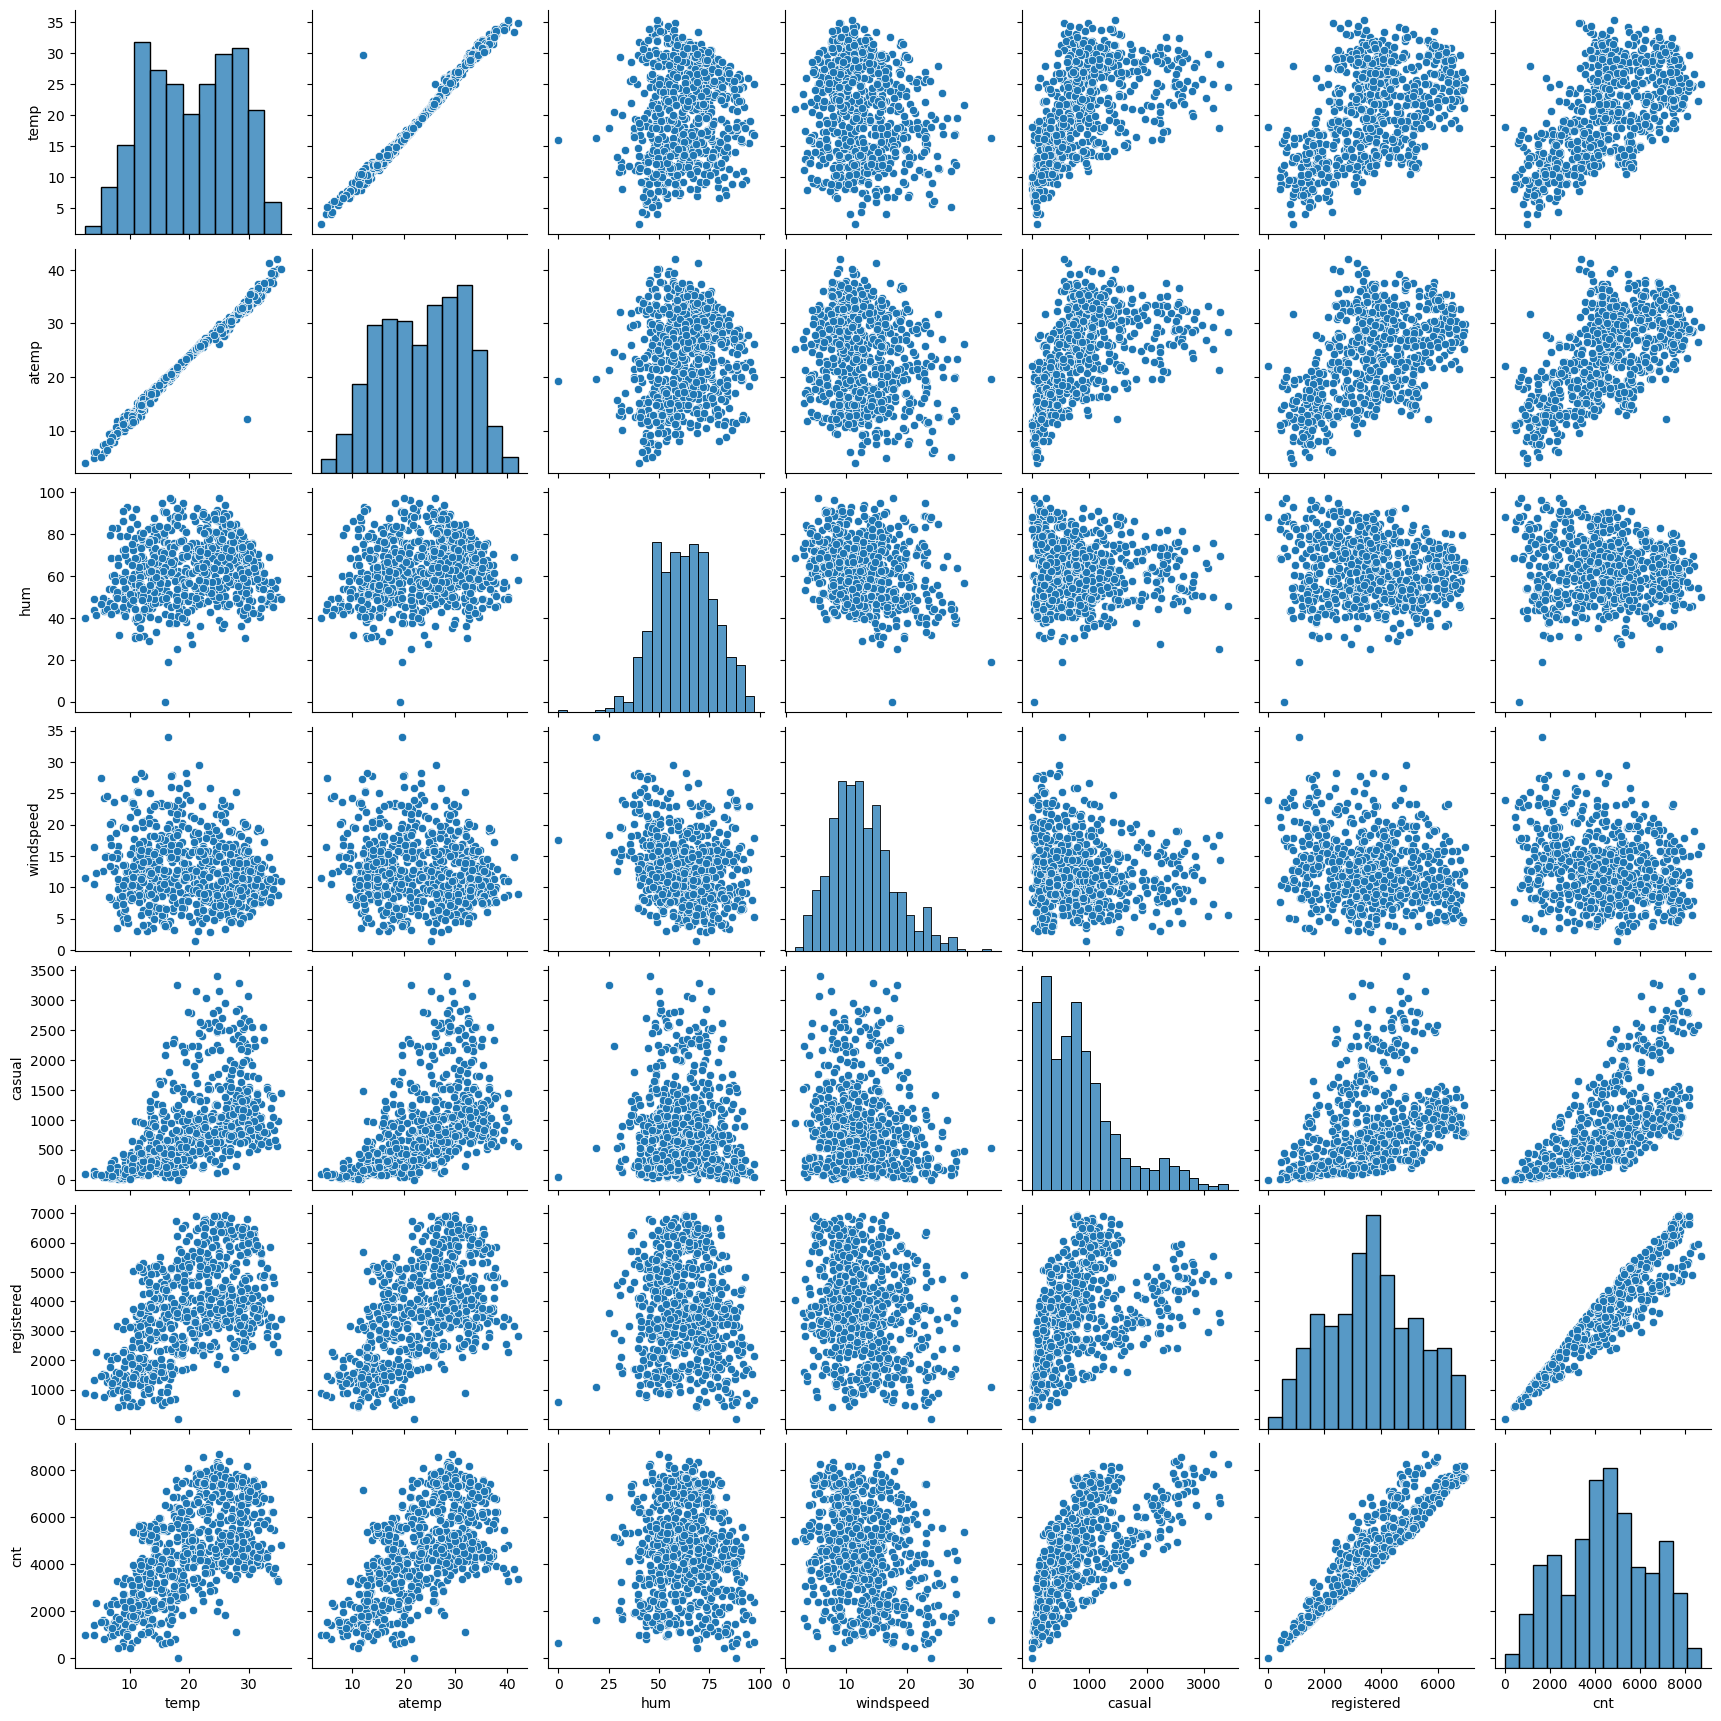

In [33]:
sns.pairplot(df_day_numeric)
plt.show()

In [34]:
cor = df_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


### Understanding Correlation among categorical and numerical values

<Axes: >

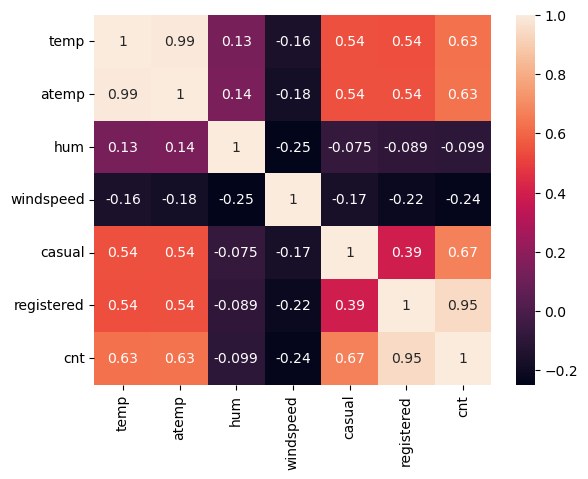

In [36]:
cor = df_day_numeric.corr()
sns.heatmap(cor, annot=True)

### Important points from heatmap:
- cnt is highly correlated with casual,registered,temp and atemp. The number of casual and registered users add upto cnt which explains the strong correlation.
- cnt is negatively correlated with windspeed.
- Among independent variables , atemp is highly correlated with temp.So we can drop the atemp variable.

In [38]:
df_day.drop('atemp',axis=1,inplace=True)   

## 4.Data Preparation

In [40]:
# Let us now prepare the data for model building.We will add dummy variables for season,mnth,weekday and weathersit.
df_day_dummies = pd.get_dummies(df_day_categorical, drop_first=True,dtype='int')
df_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Drop categorical variable columns after dummy variables are created
df_day = df_day.drop(list(df_day_categorical.columns), axis=1)

In [42]:
# Concatenate dummy variables with the original dataframe
df_day = pd.concat([df_day, df_day_dummies], axis=1)

In [43]:
df_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#We will drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
df_day=df_day.drop(['instant','dteday'], axis = 1, inplace = False)
df_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


## 5.Train-Test split and scaling

Let us start with building the model.We will start with train-test split with 70%-30% ratio 

In [47]:
# Splitting the dataframe into train and test sets

np.random.seed(0)
df_train, df_test = train_test_split(df_day, train_size=0.7, test_size=0.3, random_state=100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


In [48]:
#Let us check the shape of the train dataset
df_train.shape

(510, 31)

In [49]:
#Let us check the shape of the test dataset
df_test.shape

(219, 31)

We see that temp,hum,windspeed and cnt are having high values,so we will apply scaling for better interpretation

In [51]:
scaler = MinMaxScaler()

In [52]:
# Scaling the train dataset
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,922.0,6612.0,0.864243,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,968.0,6248.0,0.827658,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,956.0,3110.0,0.465255,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,364.0,1432.0,0.204096,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1120.0,3100.0,0.482973,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,1017.0,5647.0,0.764151,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,983.0,6278.0,0.832835,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,139.0,1778.0,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,275.0,2464.0,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


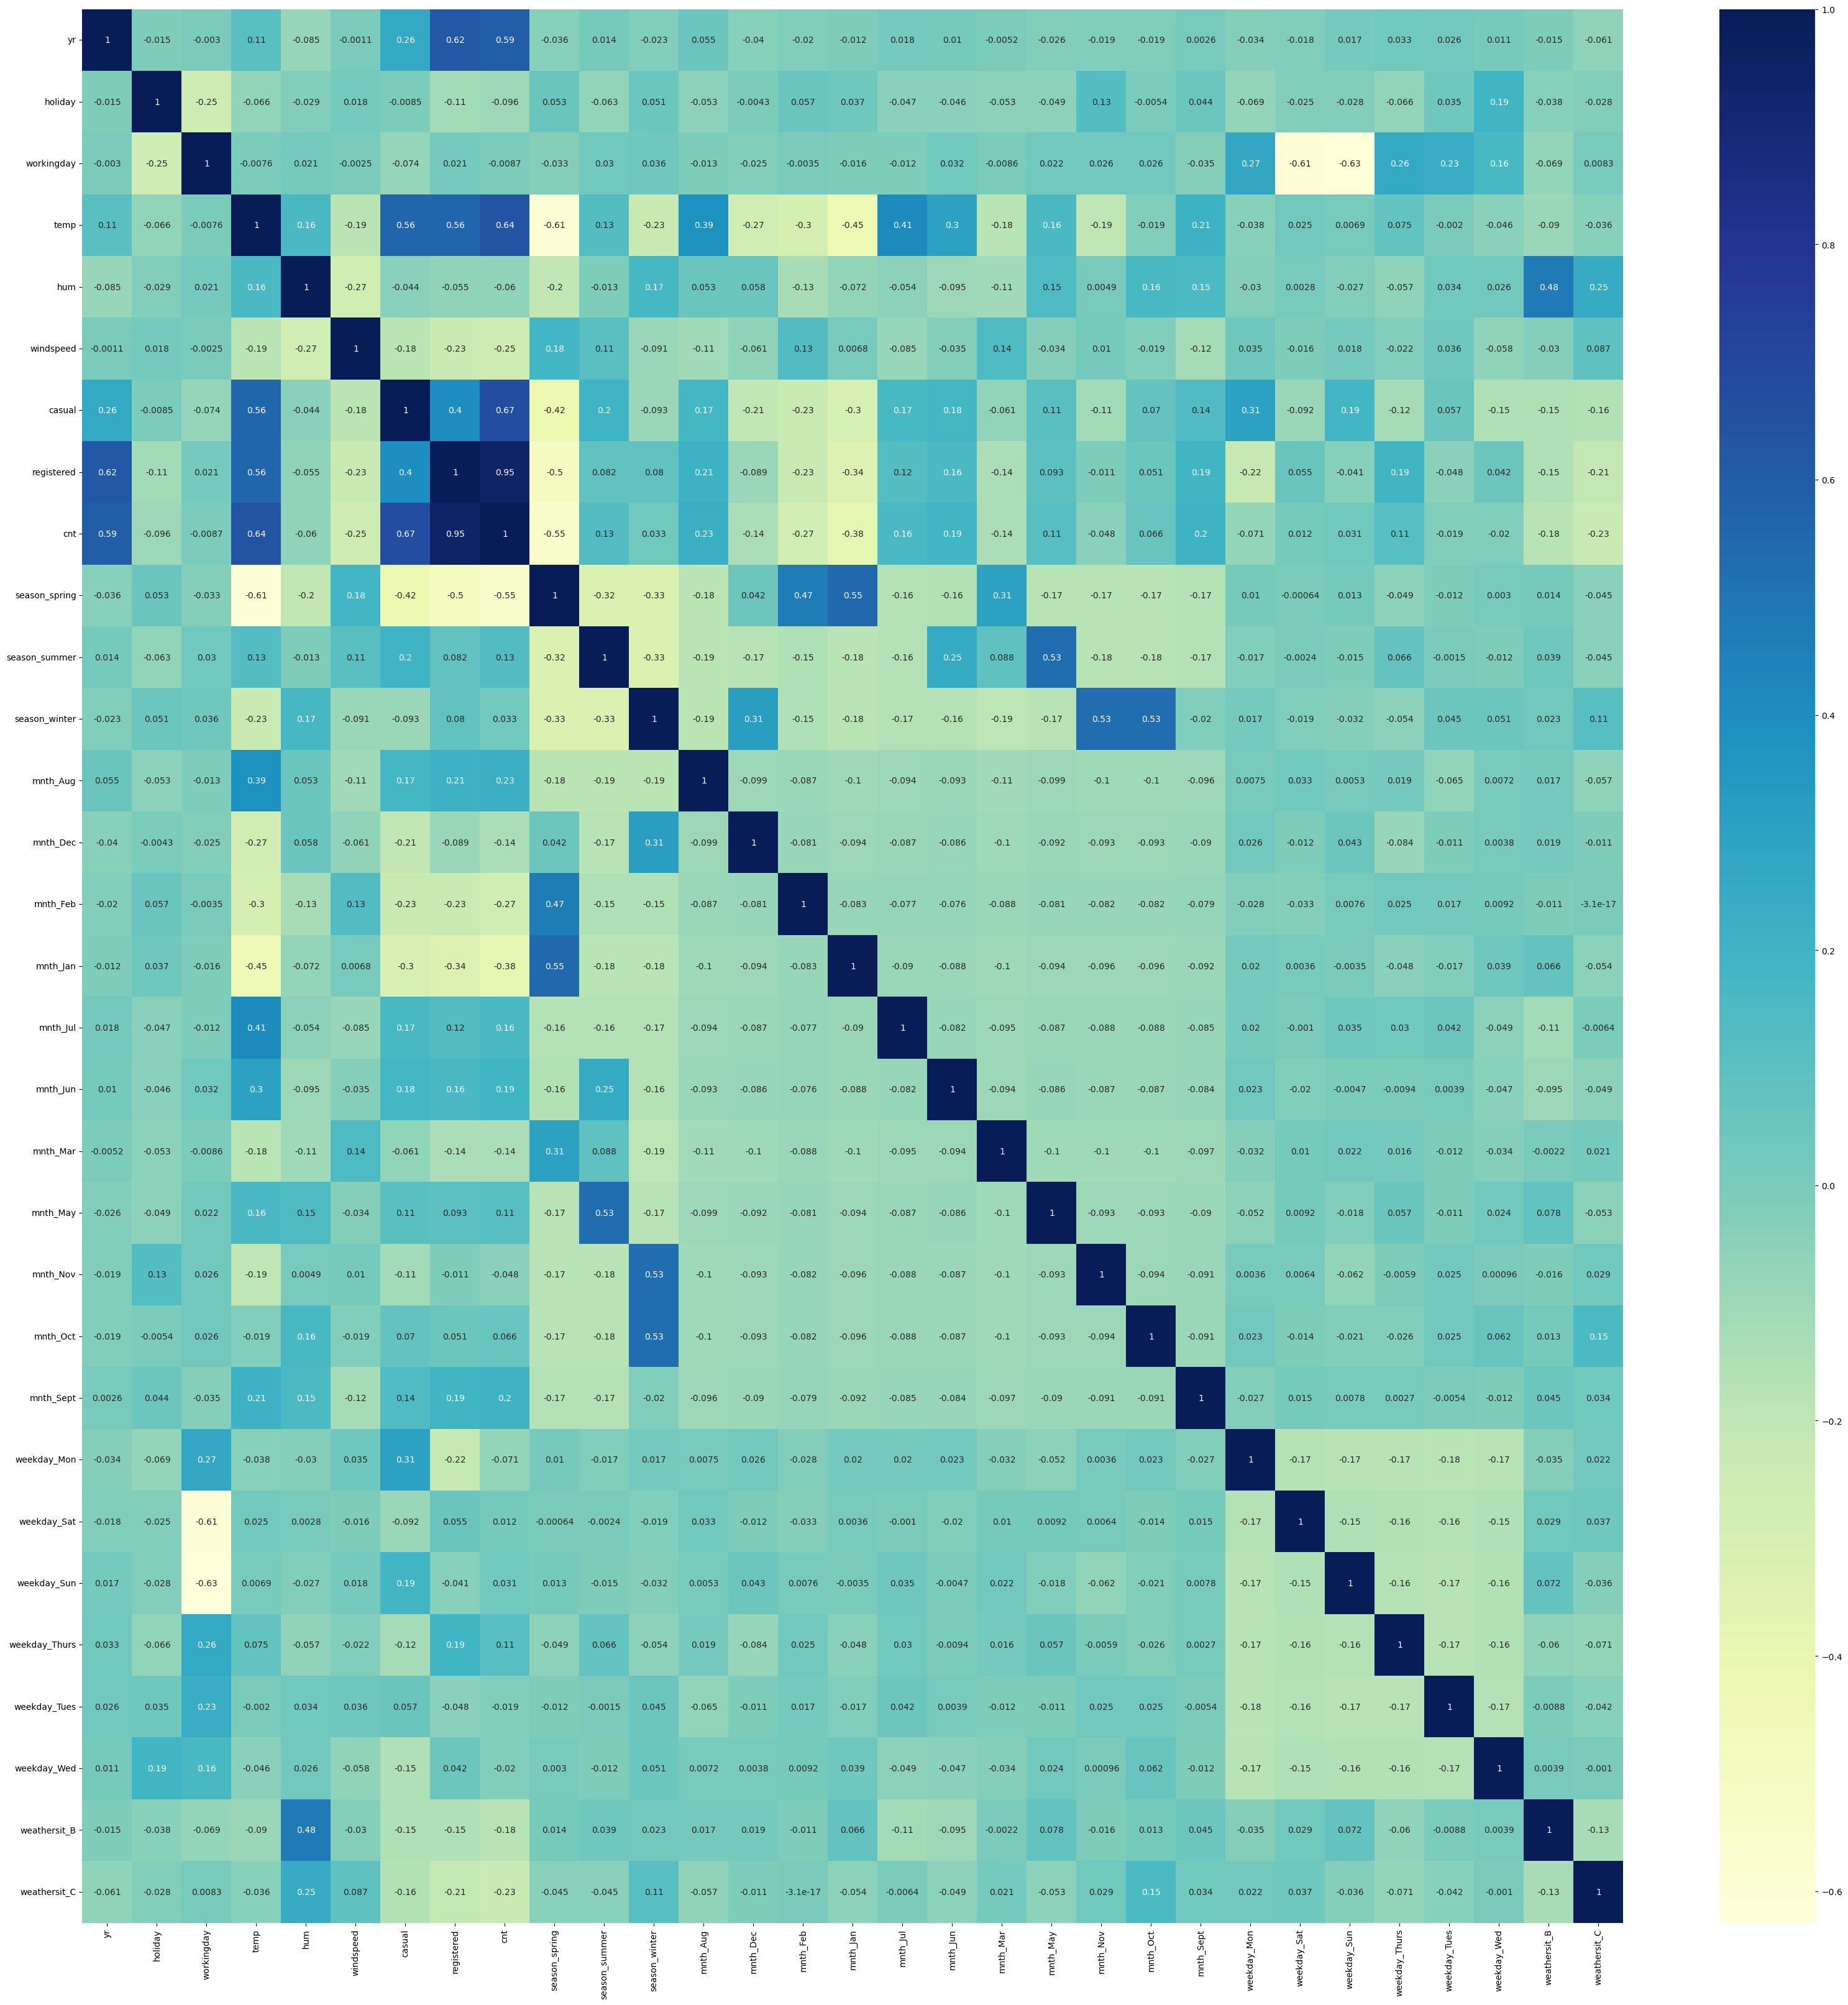

In [53]:
# BEfore proceeding further ,Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

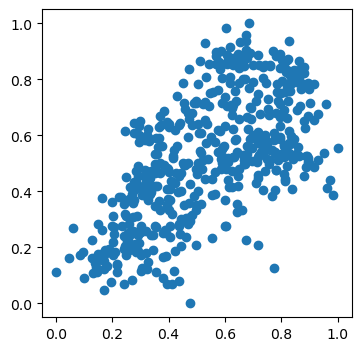

In [54]:
#temp and cnt seems to be highly correlated.Let us check the scatter plot for same.
plt.figure(figsize=[4,4])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [55]:
# We will drop 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## 6.Build model

### 6.1 Build model with all features

In [58]:
# add constant to X_train as statsmodel api doesnot add by default
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.394543
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sept        0.086055
weekday_Mon     -0.024633
weekday_Sat     -0.056319
weekday_Sun     -0.049961
weekday_Thurs    0.003863
weekday_Tues    -0.026299
weekday_Wed     -0.011241
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [59]:
# Let us check the R2, adjusted R2,significance of coefficients
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          4.33e-179
Time:                        10:21:38   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640      0.000       0.227       0.562
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer     0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter     0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul         -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun          0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar          0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sept         0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon      -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat      -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun      -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thurs     0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tues     -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed      -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================================================

This model has an Adjusted R-squared value of 84.2% which seems pretty good.
We will try to  reduce the number of features now.

In [61]:
# Instantiate -remove 
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
# getting the model summary - remove
lm.score(X_train, y_train)

0.8508991875116525

### 6.2 Model Building Using RFE - 20 features

First we will apply RFE for selecting 20 variables and use statsmodels api to build the model and evaluate significance and also check for the VIFs

In [65]:

# Import RFE
from sklearn.feature_selection import RFE

# RFE with 20 features
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=20)

# Fit with 15 features
rfe1.fit(X_train, y_train)

list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 7),
 ('weekday_Tues', False, 2),
 ('weekday_Wed', False, 5),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [66]:

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]


X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sept,weekday_Sat,weekday_Sun,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [67]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          9.48e-186
Time:                        10:21:39   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3935      0.081      4.850

In [68]:
a=X_train_rfe1.drop('const',axis=1)

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,48.84
4,hum,38.65
3,temp,29.21
17,weekday_Sun,9.80
16,weekday_Sat,9.41
6,season_spring,7.09
5,windspeed,5.47
8,season_winter,4.92
7,season_summer,4.30
11,mnth_Jan,2.55



After selecting 20 features now adjusted R2 score is 84.1 which is  good. But the VIF indicates that there are multicollinearity present among the predictors

### 6.3 Model Building Using RFE - 14 features

Let us apply RFE for selecting 14 variables and use statsmodels api to build the model and evaluate 

In [73]:

# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=14)

# Fit with 15 features
rfe2.fit(X_train, y_train)

list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thurs', False, 13),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [74]:

# Subset the features selected by rfe2
col1 = X_train.columns[rfe2.support_]


X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1,0


In [75]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm1.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.25e-189
Time:                        10:21:39   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597

After selecting 14 features now adjusted R2 score is 84.0 which is  good but for some features p value is exceeding the range.
Let us check for the multicollinearity  among the selected features



In [77]:
a=X_train_rfe2.drop('const',axis=1)

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.79
12,weathersit_B,2.29
0,yr,2.09
8,mnth_Jan,1.67
9,mnth_Jul,1.59


From the VIF score above we see that hum and temp are having >5. These seem to have high level of multicollinearity.
Next let us try to drop some more features and see how the model performs

### 6.3 Model Building Using RFE - 8 features

In [81]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 8 features
lm = LinearRegression()
rfe3 = RFE(estimator=lm, n_features_to_select=8)

# Fit with 8 features
rfe3.fit(X_train, y_train)

list(zip(X_train.columns,rfe3.support_,rfe3.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 2),
 ('mnth_Aug', False, 16),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 20),
 ('mnth_Mar', False, 21),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 18),
 ('mnth_Sept', False, 3),
 ('weekday_Mon', False, 15),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', False, 12),
 ('weekday_Thurs', False, 19),
 ('weekday_Tues', False, 14),
 ('weekday_Wed', False, 17),
 ('weathersit_B', False, 4),
 ('weathersit_C', True, 1)]

In [82]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe3.support_]

# Subsetting training data for 7 selected columns
X_train_rfe3 = X_train[col1]

# Add a constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0


In [83]:
# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          8.21e-179
Time:                        10:21:40   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4318      0.030     14.567

In [84]:
# Let us now check for the VIF for the selected features
b=X_train_rfe3.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.49
2,temp,10.38
4,windspeed,3.89
0,yr,2.03
5,season_spring,1.80
6,mnth_Jul,1.35
7,weathersit_C,1.11
1,holiday,1.03


We see that holiday has high p value and hum & temp variables are having VIF > 5. Let's start by dropping the 'holiday' variable first and check the model summary and VIF again

In [86]:
# Let's drop the 'holiday' column
X_train_rfe3.drop("holiday",axis=1,inplace=True)
X_train_rfe3

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.605840,0.355596,0,0,0
578,1.0,1,0.863973,0.679690,0.187140,0,0,0
53,1.0,0,0.202618,0.435939,0.111379,1,0,0
350,1.0,0,0.248216,0.577930,0.431816,0,0,0


In [87]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.34e-178
Time:                        10:21:40   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

In [88]:
c=X_train_rfe3.drop('const',axis=1)

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_C,1.11


After dropping the'holiday' column all the variables are within range for p value, but VIF of hum and temp are >5.We will drop the 'hum' and check the p value  and VIF once more

In [91]:
# Let's drop the 'hum' column
X_train_rfe3.drop("hum",axis=1,inplace=True)
X_train_rfe3

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [92]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Now that we have removed one variable, let's fit the model with 6 variables
lm4 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.37e-168
Time:                        10:21:40   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986

In [93]:
c=X_train_rfe3.drop('const',axis=1)

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_C,1.04


With 6 features we have got a R2 value of 79.1% which means 79.1% of the variability of cnt can be explained by this model.
Also, the p value and VIF are well under range for all these variables

## 7.Prediction

Now that we have got a good model, let us check the error distribution of training data first.Next we will make prediction on test data and evaulate the same.

In [98]:
y_train_cnt = lm4.predict(X_train_rfe3)

Text(0.5, 0, 'Errors')

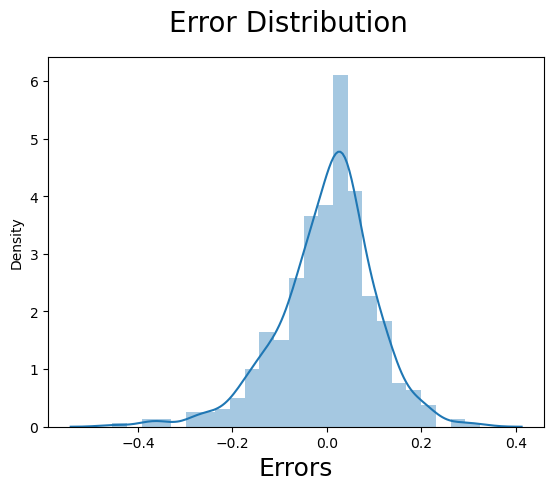

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 25)
fig.suptitle('Error Distribution', fontsize = 20)

plt.xlabel('Errors', fontsize = 18)                         

- The error distribution seems to follow a normal distribution with mean 0

Now, let us prepare the test dataset for prediction.We will apply the scaling applied in training data and drop the variables which are not needed.

In [102]:
df_test[var] = scaler.transform(df_test[var])

In [103]:
# Split the 'df_test' set into X and y 
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [104]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [105]:
# Lets get  the 6 features with which our model was built.
col2=c.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_C'], dtype='object')

In [106]:
# Add a constant to the test set created
X_test_rfe3 = X_test[col2]
X_test_rfe3 = sm.add_constant(X_test_rfe3)
X_test_rfe3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    int32  
 5   mnth_Jul       219 non-null    int32  
 6   weathersit_C   219 non-null    int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 11.1 KB


In [107]:
# Make prediction on test dataset
y_pred = lm4.predict(X_test_rfe3)

Text(0, 0.5, 'y_pred')

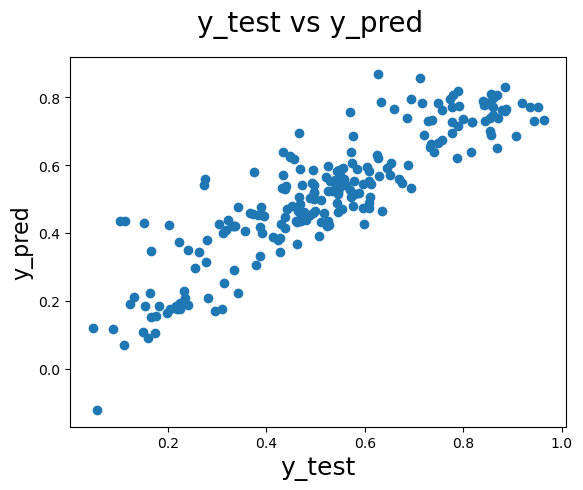

In [108]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

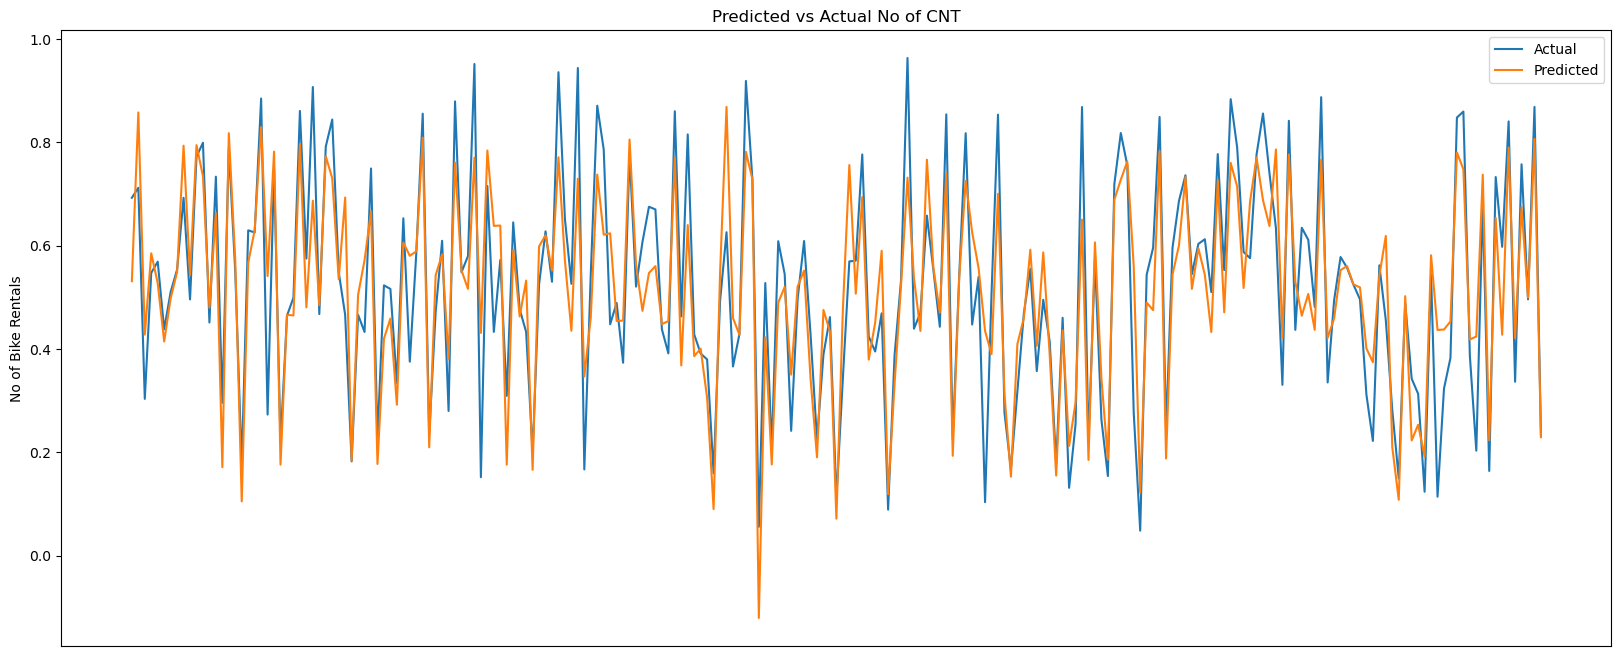

In [109]:
# Plotting Actual vs Predicted 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

Let us now check the r2 score for test data as well

In [111]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228018

-  The r-squared on training and test data is about 79.1% and 78.02% respectively.
-  Let us now look at the correlation between the final predictors

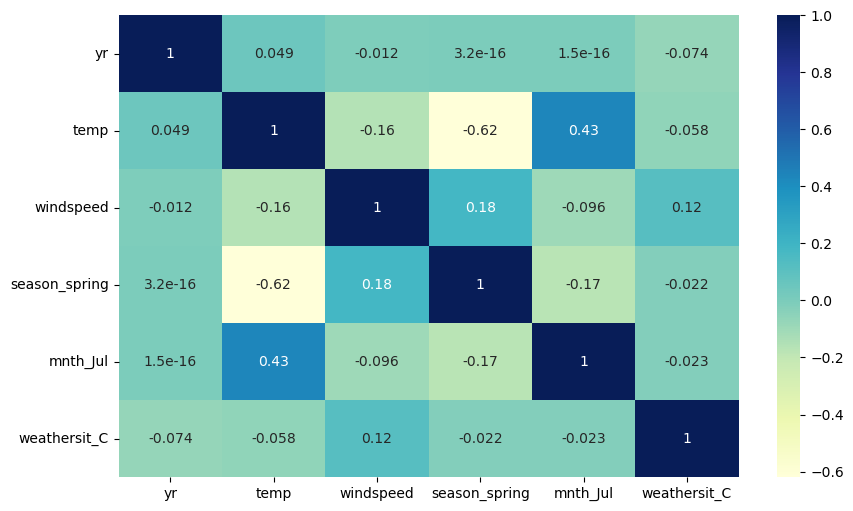

In [113]:
# Figure size
plt.figure(figsize=(10,6))

# Heatmap
sns.heatmap(df_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

- The final predictors donot seem to have very strong correlation which was earlier also validated through VIF

- This model with final 6 predictors mentioned below  can be used for prediction daily bike rental count. -
   - year(yr),
   - temperature in Celcius(temp)
   - windspeed
   - Spring season (season_spring)
   - July Month(mnth_july)
   - weathersit: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (weathersit_C)
  